In [1]:
#Predicting RUL values for CMAPSS FD001 dataset
#loading the necessary libraries into the jupyter notebooj
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
!pip install openpyxl
!pip install matplotlib seaborn
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
train_df = pd.read_excel('train_set1.xlsx')
print(train_df.head())
rul_df = pd.read_excel('RUL_set.xlsx')
print(rul_df.head())

   unit no.  time(cycles)  operational setting1  operational setting2  \
0         1             1               -0.0007               -0.0004   
1         1             2                0.0019               -0.0003   
2         1             3               -0.0043                0.0003   
3         1             4                0.0007                0.0000   
4         1             5               -0.0019               -0.0002   

   operational setting 3  sensor measurement1  sensor measurement2  \
0                    100               518.67               641.82   
1                    100               518.67               642.15   
2                    100               518.67               642.35   
3                    100               518.67               642.35   
4                    100               518.67               642.37   

   sensor measurement3  sensor measurement4  sensor measurement5  ...  \
0              1589.70              1400.60                14.62  .

In [3]:
# Load Excel files
train_df = pd.read_excel('train_set1.xlsx')
rul_df = pd.read_excel('RUL_set.xlsx')

# Clean column names (remove hidden spaces, deduplicate)
train_df.columns = train_df.columns.str.strip()
train_df = train_df.loc[:, ~train_df.columns.duplicated()]

# Now you can safely add RUL
train_df['RUL'] = rul_df.iloc[:, 1]


In [4]:
print(f"Train shape: {train_df.shape}")
print(f"RUL shape: {rul_df.shape}")


Train shape: (20631, 27)
RUL shape: (100, 2)


In [5]:
train_df['RUL'] = rul_df.iloc[:, 1]  # assuming RUL is the first column in rul_df

# Optional: check first few rows
print(train_df[['RUL']].head())

     RUL
0  112.0
1   98.0
2   69.0
3   82.0
4   91.0


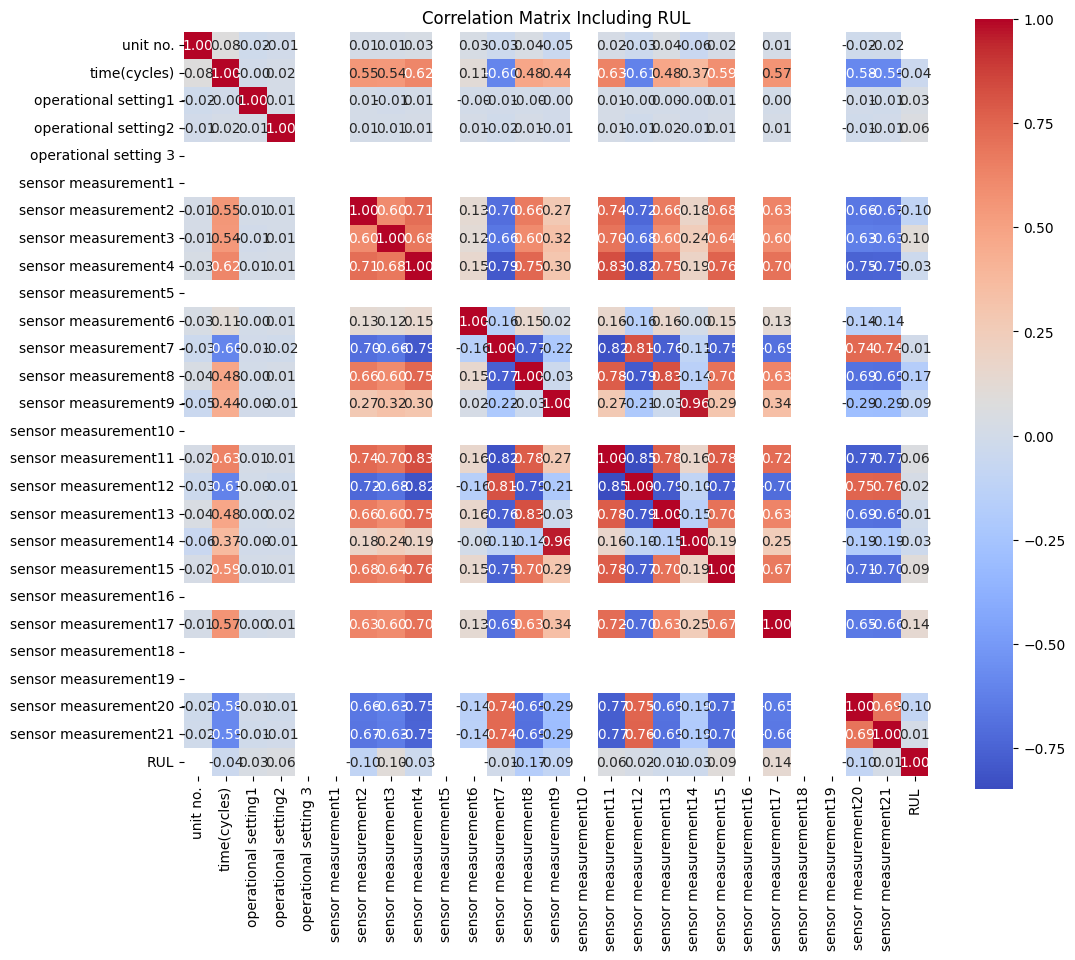

In [6]:
#correlation matrix to find the correlation of features with each other
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = train_df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Including RUL")
plt.show()



In [7]:
#dropping the least correlated columns
drop_cols = ['unit no.', 'sensor measurement1', 'sensor measurement6',
             'sensor measurement10', 'sensor measurement14', 
             'sensor measurement19', 'sensor measurement20']

df = train_df.drop(columns=drop_cols)


In [8]:
features = df.drop(columns=['RUL'])
target = df['RUL']

# Select only numeric columns to avoid errors
features_numeric = features.select_dtypes(include=[np.number])

# Min-max normalize
features_norm = (features_numeric - features_numeric.min()) / (features_numeric.max() - features_numeric.min())



In [12]:
print("Min predicted RUL:", y_test_pred.min())
print("Max predicted RUL:", y_test_pred.max())
print("Mean predicted RUL:", y_test_pred.mean())


Min predicted RUL: 9.098167
Max predicted RUL: 118.16931
Mean predicted RUL: 78.01364


Dropping constant columns: ['sensormeasurement1', 'sensormeasurement5', 'sensormeasurement10', 'sensormeasurement16', 'sensormeasurement18', 'sensormeasurement19', 'sensormeasurement1_rollmean5', 'sensormeasurement5_rollmean5', 'sensormeasurement10_rollmean5', 'sensormeasurement16_rollmean5', 'sensormeasurement18_rollmean5', 'sensormeasurement19_rollmean5']
Feature columns used: ['sensormeasurement2', 'sensormeasurement3', 'sensormeasurement4', 'sensormeasurement6', 'sensormeasurement7', 'sensormeasurement8', 'sensormeasurement9', 'sensormeasurement11', 'sensormeasurement12', 'sensormeasurement13', 'sensormeasurement14', 'sensormeasurement15', 'sensormeasurement17', 'sensormeasurement20', 'sensormeasurement21', 'sensormeasurement2_rollmean5', 'sensormeasurement3_rollmean5', 'sensormeasurement4_rollmean5', 'sensormeasurement6_rollmean5', 'sensormeasurement7_rollmean5', 'sensormeasurement8_rollmean5', 'sensormeasurement9_rollmean5', 'sensormeasurement11_rollmean5', 'sensormeasurement12_r

C:\Users\revan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


444/444 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 8741.3564 - val_loss: 9703.6846
Epoch 2/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 5599.3281 - val_loss: 7360.9932
Epoch 3/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 4260.7158 - val_loss: 6211.2388
Epoch 4/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 3649.1782 - val_loss: 5710.3345
Epoch 5/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 3448.8694 - val_loss: 5507.1475
Epoch 6/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 3421.7314 - val_loss: 5453.1650
Epoch 7/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 3494.9573 - val_loss: 5434.3125
Epoch 8/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 3440.7751 - val_loss: 5422.0933
Epoch 9/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 3337.6658 - val_loss: 3643.7854
Epoch 10/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 1619.2148 - val_loss: 2481.6741
Epoch 11/50
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 1086.6093 - val_l

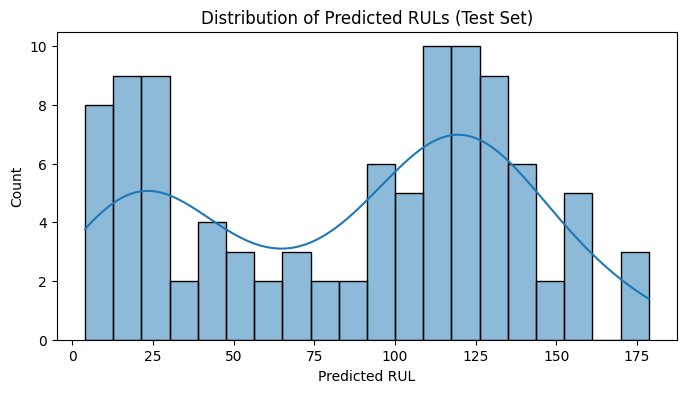

In [39]:
#building the LSTM model using the training data and predicting the remaining useful life values(RUL) for the test set

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
train_df = pd.read_excel('train_set1.xlsx')
test_df = pd.read_excel('test_set1.xlsx')
rul_df = pd.read_excel('RUL_set.xlsx')

# 2. Clean and unify column names
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')
    return df

train_df = clean_columns(train_df)
test_df = clean_columns(test_df)
rul_df = clean_columns(rul_df)

unit_col = 'unitno.'
time_col = 'time(cycles)'

# 3. Calculate RUL for training set from cycles
train_df['max_cycle'] = train_df.groupby(unit_col)[time_col].transform('max')
train_df['rul'] = train_df['max_cycle'] - train_df[time_col]
train_df.drop('max_cycle', axis=1, inplace=True)

# 4. Feature Engineering: Rolling Means (window=5)
sensor_cols = [col for col in train_df.columns if 'sensor' in col]
for col in sensor_cols:
    train_df[f'{col}_rollmean5'] = train_df.groupby(unit_col)[col].transform(lambda x: x.rolling(5, min_periods=1).mean())
    test_df[f'{col}_rollmean5'] = test_df.groupby(unit_col)[col].transform(lambda x: x.rolling(5, min_periods=1).mean())

# 5. Identify feature columns (exclude unit, time, RUL, and operational settings)
exclude_cols = [unit_col, time_col, 'rul']
feature_cols = [col for col in train_df.columns if col not in exclude_cols and 'operationalsetting' not in col]
feature_cols = [col for col in feature_cols if col in test_df.columns]

# 6. Remove constant columns
constant_cols = [col for col in feature_cols if train_df[col].nunique() <= 1]
if constant_cols:
    print("Dropping constant columns:", constant_cols)
feature_cols = [col for col in feature_cols if col not in constant_cols]

print("Feature columns used:", feature_cols)

# 7. Preprocessing function
def preprocess(df, feature_cols, stats=None):
    # Fill missing values per unit
    for col in feature_cols:
        df[col] = df.groupby(unit_col)[col].transform(lambda x: x.ffill())
        df[col] = df[col].fillna(df[col].median())
    # Normalize
    if stats:
        min_vals, max_vals = stats
        df[feature_cols] = (df[feature_cols] - min_vals) / (max_vals - min_vals + 1e-8)
    else:
        min_vals = df[feature_cols].min()
        max_vals = df[feature_cols].max()
        df[feature_cols] = (df[feature_cols] - min_vals) / (max_vals - min_vals + 1e-8)
        stats = (min_vals, max_vals)
    # Check for NaN or Inf
    if df[feature_cols].isnull().any().any():
        print("NaN found in features after preprocessing!")
    if np.isinf(df[feature_cols].values).any():
        print("Inf found in features after preprocessing!")
    return df, stats

# 8. Sequence generation
def create_sequences(df, feature_cols, sequence_length, is_test=False):
    X, y, ids = [], [], []
    for unit in df[unit_col].unique():
        unit_df = df[df[unit_col] == unit].sort_values(time_col)
        data = unit_df[feature_cols].values
        if is_test:
            if len(data) >= sequence_length:
                X.append(data[-sequence_length:])
                ids.append(unit)
            else:
                print(f"Unit {unit} skipped: only {len(data)} cycles (need {sequence_length})")
        else:
            rul_values = unit_df['rul'].values
            for i in range(len(data) - sequence_length + 1):
                X.append(data[i:i+sequence_length])
                y.append(rul_values[i+sequence_length-1])
    X = np.array(X)
    y = np.array(y) if not is_test else None
    return X, y, ids

# 9. Preprocess training data
SEQUENCE_LENGTH = 30
train_df, train_stats = preprocess(train_df, feature_cols)
X_train, y_train, _ = create_sequences(train_df, feature_cols, SEQUENCE_LENGTH)

# Diagnostics for labels and features
print("RUL min:", y_train.min(), "max:", y_train.max(), "std:", y_train.std())
print(train_df[feature_cols].describe())

# Check for NaN/Inf in X_train and y_train
assert not np.isnan(X_train).any(), "NaN in X_train"
assert not np.isinf(X_train).any(), "Inf in X_train"
assert not np.isnan(y_train).any(), "NaN in y_train"
assert not np.isinf(y_train).any(), "Inf in y_train"
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# 10. Build and train improved LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQUENCE_LENGTH, len(feature_cols))),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
])

# 11. Training error
y_train_pred = model.predict(X_train).flatten()
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
print(f"Training MSE: {mse:.4f}")
print(f"Training RMSE: {rmse:.4f}")
print(f"Training MAE: {mae:.4f}")

# 12. Preprocess test data
test_df, _ = preprocess(test_df, feature_cols, train_stats)
X_test, _, test_ids = create_sequences(test_df, feature_cols, SEQUENCE_LENGTH, is_test=True)

# Check for NaN/Inf in X_test
assert not np.isnan(X_test).any(), "NaN in X_test"
assert not np.isinf(X_test).any(), "Inf in X_test"
print(f"X_test shape: {X_test.shape}, test_ids: {test_ids}")

# 13. Predict RUL for test set
if X_test.shape[0] > 0:
    y_test_pred = model.predict(X_test).flatten()
    # Optional: Clip negative predictions
    y_test_pred = np.clip(y_test_pred, 0, None)
    out_df = pd.DataFrame({
        unit_col: test_ids,
        'Predicted_RUL': y_test_pred
    })
    print("\nPredicted RUL values for test set:")
    print(out_df)
    out_df.to_excel('test_set1_rul_predictions.xlsx', index=False)
    print("\nTest set RUL predictions saved to 'test_set1_rul_predictions.xlsx'")
else:
    print("No test sequences created! Check feature columns and preprocessing.")

# 14. Visualize prediction distribution
plt.figure(figsize=(8, 4))
sns.histplot(y_test_pred, bins=20, kde=True)
plt.xlabel('Predicted RUL')
plt.title('Distribution of Predicted RULs (Test Set)')
plt.show()


In [40]:
# error for the training set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# After you have y_train and y_train_pred
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"Training MSE: {mse:.4f}")
print(f"Training RMSE: {rmse:.4f}")
print(f"Training MAE: {mae:.4f}")
print(f"Training R2 Score: {r2:.4f}")


Training MSE: 847.8811
Training RMSE: 29.1184
Training MAE: 18.9864
Training R2 Score: 0.7789


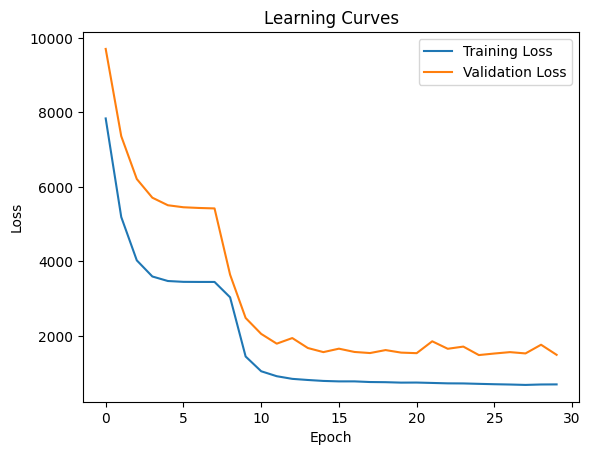

In [41]:
# learning curves on each data

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves')
plt.show()
